# Вводная часть
## Сборный проект для интернет-магазина «Стримчик»

**Цель проекта**: выявить определяющие успешность игры закономерности, чтобы в будущем можно было определять перспективные направления развития, составлять рекламные кампании и так далее. 

**Выборка**: Данные 2016 года об играх, игровых продажах, оценках критиков, жанре игры, годе выпуска и игровой платформе. 

**Примечание_1**: Данные за 2016 год могут быть неполными.

**Примечание_2**: В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating
Board) — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для
подростков».

**Описание данных**

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Ход исследования**

**Шаг 1. Подготовка данных**

**Надо:**
- Заменить названия столбцов (привести к нижнему регистру);
- Преобразовать данные в нужные типы. Описать, в каких столбцах заменил тип данных и почему;
- Обработать пропуски при необходимости:
- Объяснить, почему заполнил пропуски определённым образом или почему не стал это делать;
- Описать причины, которые могли привести к пропускам;
- Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрать это значение и описать, как его обработать;
- Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

**Шаг 2. Провести исследовательский анализ данных**

**Надо:**
- Посмотреть, сколько игр выпускалось в разные годы.
- Посмотреть, как менялись продажи по платформам.
- Посмотреть какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
- Посмотреть на общее распределение игр по жанрам.

**Шаг 3. Составить портрет пользователя каждого региона**

**Надо:**
- Определить для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    - Самые популярные жанры (топ-5). Поясните разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Шаг 4. Проверить гипотезы**

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшенигры) и Sports (англ. «спортивные соревнования») разные.

**Шаг 5. Написать общий вывод**

# Обзор данных

In [1]:
# импортируем все необходимые библиотеки, которые могут понадобиться в исследовании
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np
from scipy import stats as st

In [2]:
# чтение файла с данными и сохранение в games
try:
    games = pd.read_csv('/Users/imac/Downloads/games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')

In [3]:
#Функция получения первичной информации о датафрейме

def first_look (data):
    print('---------Первые 10 строк-----------')
    display(data.head(10))
    print('---------Последние 10 строк---------')
    display(data.tail(10))
    print('---------Типы данных---------------\n')
    display(data.info())
    print('---------Статистическая сводка---------------')
    display(data.describe())
    print('---------Пропуски-----------\n')
    for element in data.columns:
        if data[element].isna().sum() > 0: 
            print(element, ' - ', data[element].isna().sum(), 'пропусков') 
            count = +1
        if count == 0:
            print('Пропусков НЕТ\n')
    print('\n---------Процент пропусков от всего датасета-----------')
    display(data.isna().mean().sort_values(ascending=False)*100)
    print('\n---------Дубликаты-----------\n')
    if data.duplicated().sum() > 0:
        print('Дубликатов: ', data.duplicated().sum())
    else:
        print('Дубликатов НЕТ')

In [4]:
# получение общей информации о данных в таблице games
first_look(games)

---------Первые 10 строк-----------


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


---------Последние 10 строк---------


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


---------Типы данных---------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

---------Статистическая сводка---------------


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


---------Пропуски-----------

Name  -  2 пропусков
Year_of_Release  -  269 пропусков
Genre  -  2 пропусков
Critic_Score  -  8578 пропусков
User_Score  -  6701 пропусков
Rating  -  6766 пропусков

---------Процент пропусков от всего датасета-----------


Critic_Score       51.319174
Rating             40.478612
User_Score         40.089740
Year_of_Release     1.609333
Name                0.011965
Genre               0.011965
Platform            0.000000
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
dtype: float64


---------Дубликаты-----------

Дубликатов НЕТ


## Вывод

1. Столбцы написаны не методом snake_case
2. Столбцы `Year_of_Release`, `Critic_Score`, `User_Score` имеют не подходящий тип данных. 
3. Имеется большое кол-во пропусков в колонках `Critic_Score` (51% пропусков), `Rating` (40,5% пропусков), `User_Score` (40% пропусков). 
4. Дубликатов в датасете нет. 

--------

# Предобработка данных

## Названия колонок

In [5]:
# переведем названия колонок к виду snake_case
games.columns = games.columns.str.lower()
#test
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Посмотрим на пропуски в колонках. 

## Пропуски

### name

In [6]:
# колонка name
games[games.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Об этих играх нет достаточных данных, в строках имеется много пропусков, нужно эти строки удалить. 

In [7]:
games = games.dropna(subset = ['name'])

### year_of_release

In [8]:
# колонка year_of_release
display(games[games.year_of_release.isna()])
display('процент пропусков от всего датасета', games['year_of_release'].isna().mean()*100)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


'процент пропусков от всего датасета'

1.6095255190570215

Заполнять такие данные медианой или средним значением будет некорректно, ведь игры между собой никак не связаны, единственное, что можно предположить – это заполнить пропуски датой выхода платформы на которую рассчитана игра, если с Wii, PS2 и PS3 более менее понятно, то вопросы возникают с PC, какой год указать, если компьютеры были придуманы задолго до игр. Лучше сэкономить время и нервы и удалить такие пропуски, так как они не велики.  
Пропуски в этой колонке составляют меньше 2% от всего датасета, так что их можно удалить. 

In [9]:
games = games.dropna(subset = ['year_of_release'])

### rating

In [10]:
# колонка rating
display(games[games.rating.isna()])
display('процент пропусков от всего датасета', games['rating'].isna().mean()*100)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


'процент пропусков от всего датасета'

40.59839455120409

Видно, что пропуски в колонке `rating` встречаются вместе с пропусками в колонках `critic_score`, `user_score`. Пропуски есть независимо от того новая это игра или старая, на какой платформе можно в нее поиграть, а также жанры встречаются разные. Удалить строки с пропусками мы не можем, так как они составляют почти половину датасета. В данном случае следует поставить "заглушку". 

In [11]:
games['rating'] = games['rating'].fillna('Unknown')
games.rating.value_counts()

Unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
RP            1
AO            1
Name: rating, dtype: int64

Немного покопавшись в интернете можно получить определения для представленных рейтингов. 
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»:
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»
- K-A - старый вариант маркировки E (for everyone)

Исходя из этого можно заменить 'RP' на 'Unknown', 'K-A' на 'E' и 'AO' на 'M'

In [12]:
games.loc[games['rating'] == 'RP', 'rating'] = 'Unknown'
games.loc[games['rating'].isin(['K-A']), 'rating'] = 'E'
games.loc[games['rating'] == 'AO', 'rating'] = 'M'

#test
games.rating.value_counts()

Unknown    6677
E          3924
T          2905
M          1537
E10+       1393
EC            8
Name: rating, dtype: int64

Для определения рейтинга издатель присылает в ESRB видеоролик, который содержит наиболее впечатляющие и резкие сцены игры. Также издатель заполняет специальную анкету сведениями о содержании игры.

Возможно некоторые создатели игр просто не посчитали нужным отправлять заявку в негосударственную компанию для оценки своей игры, поэтому не все игры имеют какое-либо оценивание в колонке `rating` 

### critic_score

In [13]:
# колонка critic_score
display(games[games.critic_score.isna()])
display('процент пропусков от всего датасета', games['critic_score'].isna().mean()*100)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Unknown
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Unknown
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Unknown
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Unknown


'процент пропусков от всего датасета'

51.453417659936754

Как и в случае с `rating` пропущенных значений очень много и не предоставляется возможным их восстановить, также ставим заглушку '-10', так как нам нужны данные типа float для дальнейших анализов, а отрицательных рейтингов нет, так что мы с легкостью сможем опознать пропцщенные значения. 

In [14]:
#games['critic_score'] = games['critic_score'].fillna('-10')
#games['critic_score'] = games['critic_score'].astype('float')
#games.critic_score.value_counts()

#games.loc[games['critic_score'] == 'tbd', 'user_score'] = '-10'
#games.user_score.value_counts()
#games['user_score'] = games['user_score'].astype('float')
#games.loc[games['critic_score'] == 'Unknown', 'user_score'] = 'Unknown'
games['critic_score'] = games['critic_score'].fillna('-10')
games['critic_score'] = games['critic_score'].astype('float') #приводим к нужному типу
games.critic_score.value_counts()

-10.0    8461
 70.0     252
 71.0     248
 75.0     240
 80.0     235
         ... 
 20.0       3
 29.0       3
 13.0       1
 17.0       1
 21.0       1
Name: critic_score, Length: 82, dtype: int64

Что касается перевода `critic_score` в тип данных 'int', я не стал этого делать, хотя в колонке находятся целочисленные показатели, чтобы в будущем, если понадобится посчитать, к примеру, корреляцию между `critic_score` и `user_score` данные находились в одной размерности. Либо в теории можно умножить показатели колонки `user_score` на 10, и обе колонки перевести в тип данных 'int'. 

### user_score

In [15]:
# колонка user_score
display(games[games.user_score.isna()])
display('процент пропусков от всего датасета', games['user_score'].isna().mean()*100)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-10.0,NaN,Unknown
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-10.0,NaN,Unknown
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-10.0,NaN,Unknown
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-10.0,NaN,Unknown
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,-10.0,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-10.0,NaN,Unknown
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-10.0,NaN,Unknown
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-10.0,NaN,Unknown
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-10.0,NaN,Unknown


'процент пропусков от всего датасета'

40.166626125030405

Как и в случае с `rating` пропущенных значений очень много и не предоставляется возможным их восстановить, также ставим заглушку 'Unknown'

In [16]:
#games['user_score'] = games['user_score'].astype('float')*10

In [17]:
games['user_score'] = games['user_score'].fillna('-10')
games.user_score.value_counts()

-10    6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
1.3       2
0.5       2
1         2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

Разберемся с 'tbd'

tbd означает `to be determined`. То есть в будущем подлежит определению. Следовательно это точно такие же неопределенные значения, их можно преобразовать в '-10'. 

In [18]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = '-10'
games.user_score.value_counts()
games['user_score'] = games['user_score'].astype('float')
#games.loc[games['user_score'] == '-10', 'user_score'] = 'Unknown'

games['user_score'] = games['user_score'].astype('float')
games.critic_score.value_counts()
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


### year_of_release

Приведем года в тип данных int, так как года измеряются целыми числами

In [19]:
# приведем типы данных
games['year_of_release'] = games['year_of_release'].astype('int')

#test
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### общие продажи по регионам

In [20]:
# Найдем общие продажи по регионам
games['general_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

#test
games.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-10.0,-10.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-10.0,-10.0,Unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-10.0,-10.0,Unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-10.0,-10.0,Unknown,28.31


## Вывод

- [x]  Заменил названия столбцов (привел к нижнему регистру);
- [x]  Преобразовал данные в нужные типы. Описал, в каких столбцах заменил тип данных и почему;
- [x]  Обработал пропуски;
- [x]  Объяснил, почему заполнил пропуски определённым образом или почему не стал это делать;
- [x]  Описал причины, которые могли привести к пропускам;
- [x]  Обратил внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрал это значение и описал, как его обработал;
- [x]  Посчитал суммарные продажи во всех регионах и записал их в отдельный столбец.

--------




# Исследовательский анализ

## Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

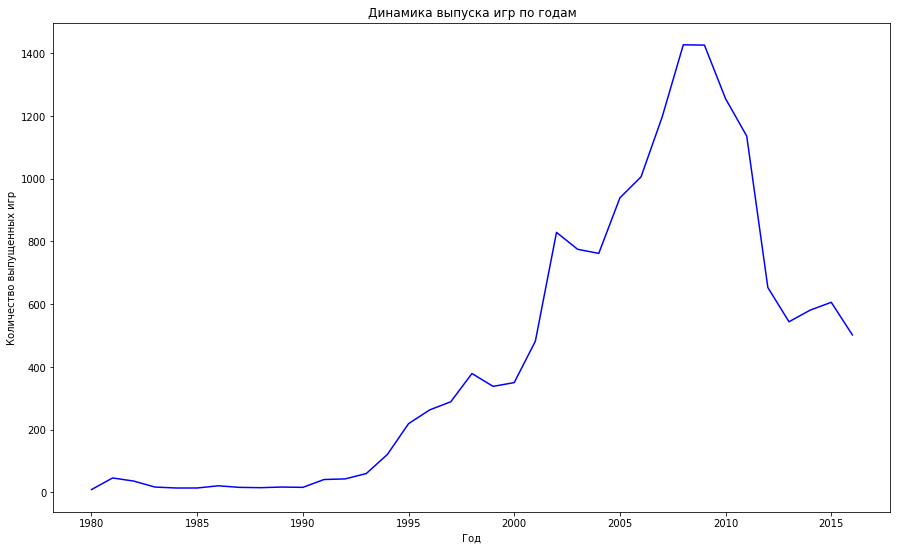

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
Name: year_of_release, dtype: int64

In [21]:
schedule_by_year = games.pivot_table(index='year_of_release', values='general_sales', aggfunc='count')
plt.figure(figsize=(15, 9))
(sns.lineplot(data = schedule_by_year, x = schedule_by_year.index, y = 'general_sales', color = 'blue')
    .set(title = 'Динамика выпуска игр по годам', xlabel = 'Год', ylabel = 'Количество выпущенных игр'))
plt.show()

games.year_of_release.value_counts().head()

### Вывод

На графике видно, что развитие игр с 1980 года по 2000 было слабым. 

В 2000 году мы видим активный рост количества игр на полках магазинов. Продолжался этот рост до 2009 года. 

На 2008 и 2009 год приходится пик графика, значит в эти года производили больше всего игр (1427 и 1426 игр соответсвенно). 

Начиная с 2010 года количество выпускаемых игр значительно снизилось и остановилось на отметке в 502 игры. 

Данные за все периоды важны, благодаря этому можно проследить динамику разработки игр. 

## Продажи по платформам

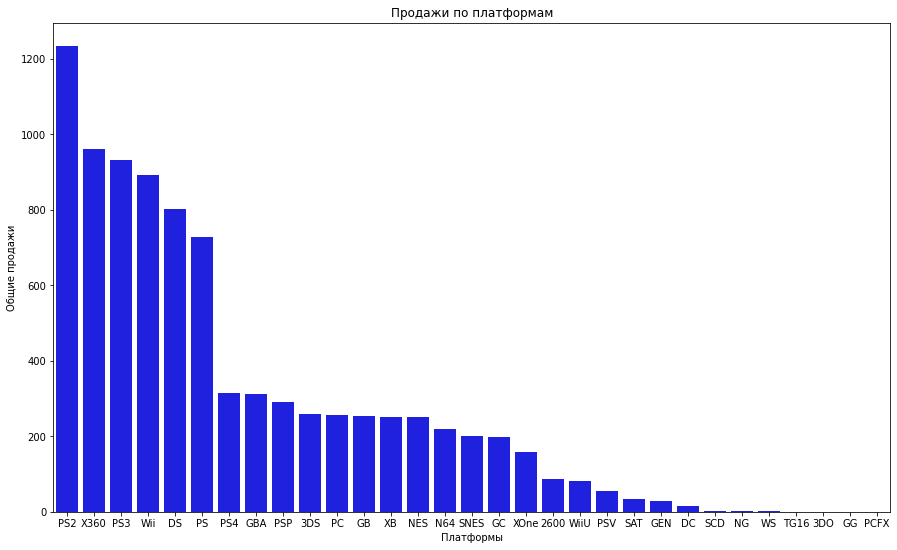

In [22]:
platform_sales = (games.pivot_table(index='platform', values='general_sales', aggfunc='sum')
    .sort_values('general_sales', ascending=False)
)
plt.figure(figsize=(15, 9))
(sns.barplot(data = platform_sales, x = platform_sales.index, y = 'general_sales', color = 'blue')
    .set(title = 'Продажи по платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()

In [23]:
platform_sales

,general_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


PS2


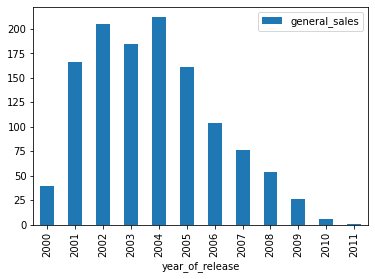

X360


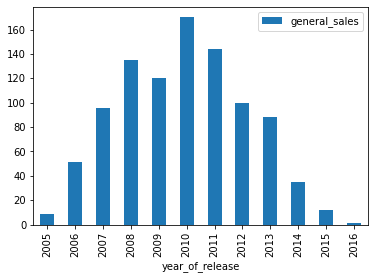

PS3


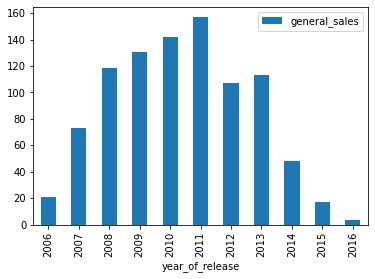

Wii


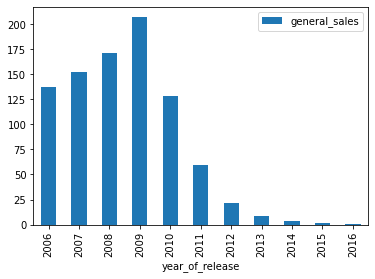

DS


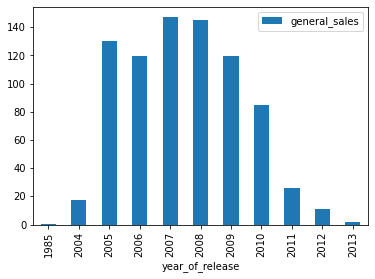

PS


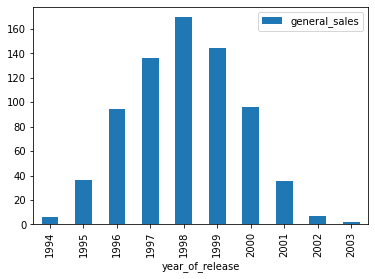

In [24]:
# создаем цикл для формирования графиков

for platform in platform_sales.index[:6]:
    print(platform)
    (games
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='general_sales', aggfunc='sum')
     .plot(kind='bar')
    )
    plt.show()

### Вывод

Наибольшее количество продаж было у игр для PS2. Это легко объясняется тем, что японские производители далеко шагнули вперед в плане развития игровых консолей. Не было аналогов новому PS2, люди охотно покупали новую приставку, а вместе с ней и игры. 

В топ 6 конкурентов среди продаж вошли:
- PlayStation 2 (успешен в 2002-2004 годах)
- Xbox360 (успешен в 2010-2011 годах)
- PlayStation 3 (успешен в 2008-2011 годах)
- Wii Nintendo (успешен в 2006-2009 годах)
- Nintendo DS (успешен в 2007-2008 годах)
- PlayStation (успешен в 1998-1999 годах)

Остальные консоли не могут похвастаться таким объемом продаж. 

Новые платформы быстро набирают популярность, наращивают/удерживают ее в течение 3-4 лет и затем их продажи снижаются. 
При этом видно, что из представленного ТОПа все платформы уже не являются актуальными. 

## Актуальные данные

Актуальными данными будем считать последние данные за 3 года с сохранением нынешнего для будущих анализов. Следовательно, нам надо оставить 2016 год, 2015 год и 2014 год, все, что было раньше – нас не интересует. 

In [25]:
# создаем таблицу с актуальными годами
actual_games = games.query('year_of_release >= 2014').copy()

In [26]:
actual_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-10.0,-10.0,Unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-10.0,-10.0,Unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-10.0,-10.0,Unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-10.0,-10.0,Unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-10.0,-10.0,Unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-10.0,-10.0,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-10.0,-10.0,Unknown,0.01


## Какие платформы лидируют по продажам, растут или падают?

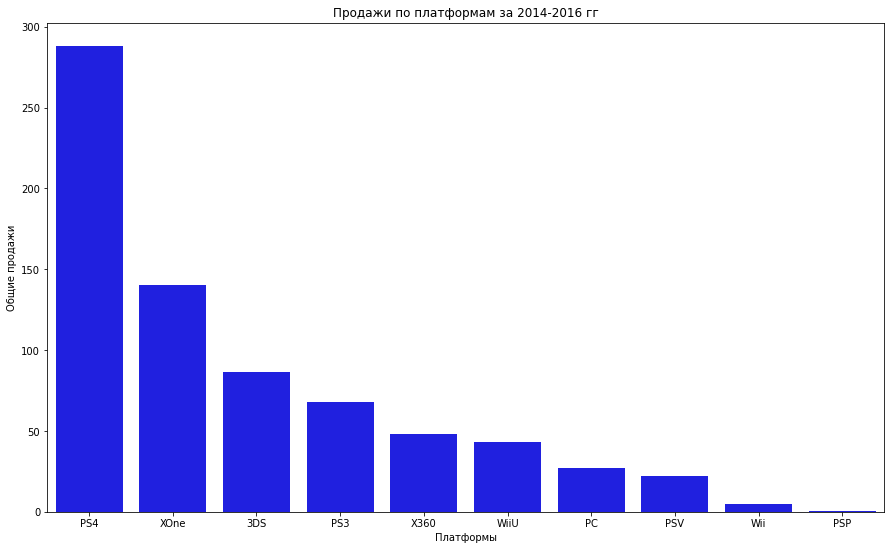

In [27]:
actual_platform_sales = (
    actual_games
    .pivot_table(index='platform', values='general_sales', aggfunc='sum')
    .sort_values('general_sales', ascending=False)
)
plt.figure(figsize=(15, 9))
(sns.barplot(data = actual_platform_sales, x = actual_platform_sales.index, y = 'general_sales', color = 'blue')
    .set(title = 'Продажи по платформам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()

### Вывод

На данном графике видно, что платформы, показывающие успешные показатели по продажам за 2014-2016 год значительно отличаются от того графика, где представлены продажи платформ за все время. Если раньше лидером по продажам был PS2, то сейчас на лидирующей строчке оказалась PS4, и почетное второе место по продажам игр за 2014-2016 год занимает XboxOne. PS4 и XboxOne являются привлекательнее остальных платформ. 

PS4


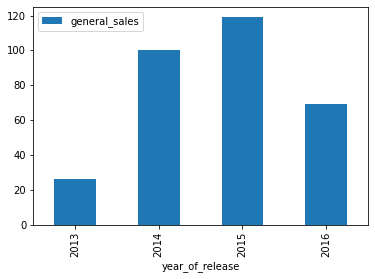

XOne


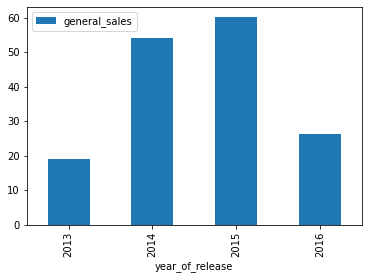

3DS


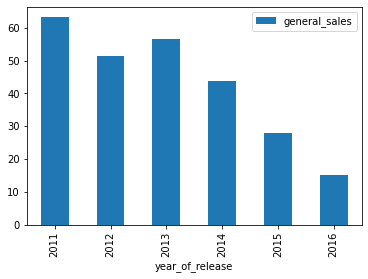

PS3


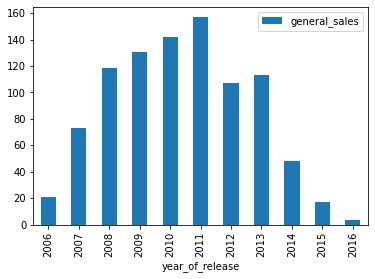

X360


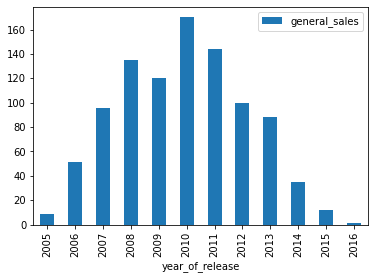

WiiU


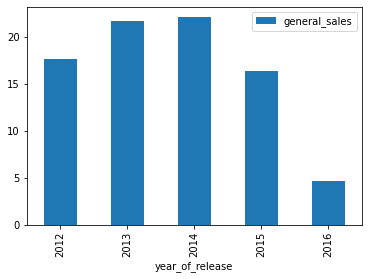

PC


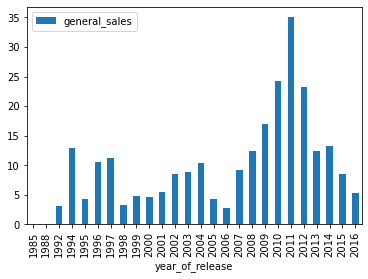

PSV


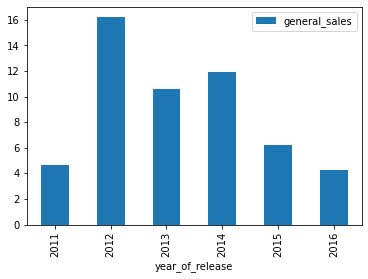

Wii


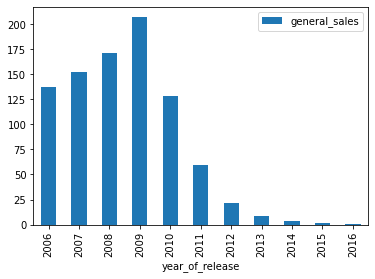

PSP


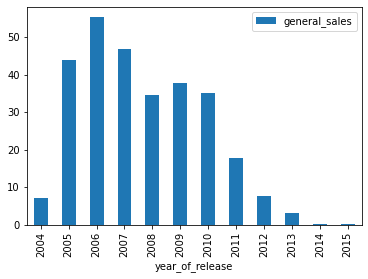

In [28]:
# создаем цикл для формирования графиков

for platform in actual_platform_sales.index:
    print(platform)
    (games
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='general_sales', aggfunc='sum')
     .plot(kind='bar')
    )
    plt.show()

### Вывод

Так как у нас имеются не все данные за 2016 год, немного сложно сказать о том, находятся ли сейчас продажи каких-либо игр на определенных платформах на пике или на спаде. Однако точно можно заметить, что некоторые платформы уже потеряли свою презентабельность, так например мы видим "угасающий" график у 
- 3DS, 
- PS3, 
- X360, 
- PC, 
- PSV, 
- Wii,
- PSP.

Остальные же платформы оставляют надежды на рост или не падение популярности. 

**Потенциально прибыльные платформы:**
- PS4
- XOne
- WiiU

In [29]:
# составление таблицы из потенциально прибыльных платформ
new_games = actual_games.query('platform not in ["3DS", "PS3", "X360", "PC", "PSV", "Wii", "PSP"]')

In [30]:
#test
new_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-10.0,-10.0,Unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-10.0,-10.0,Unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,-10.0,6.6,E,0.01
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,-10.0,-10.0,Unknown,0.01
16652,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,Unknown,0.01


## График «ящик с усами» по глобальным продажам игр в разбивке по платформам.

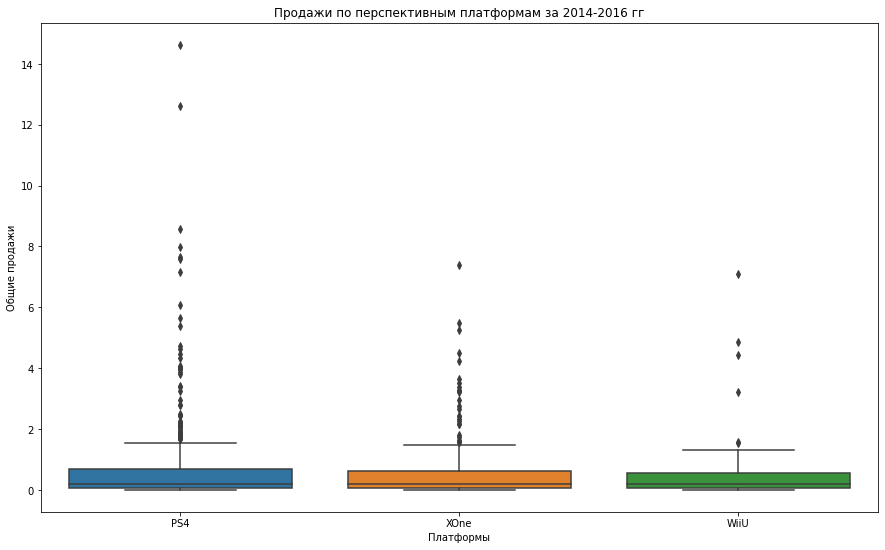

In [31]:
plt.figure(figsize=(15, 9))
(sns.boxplot(data = new_games, y = 'general_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам за 2014-2016 гг', 
         xlabel = 'Платформы', 
         ylabel = 'Общие продажи'))
plt.show()

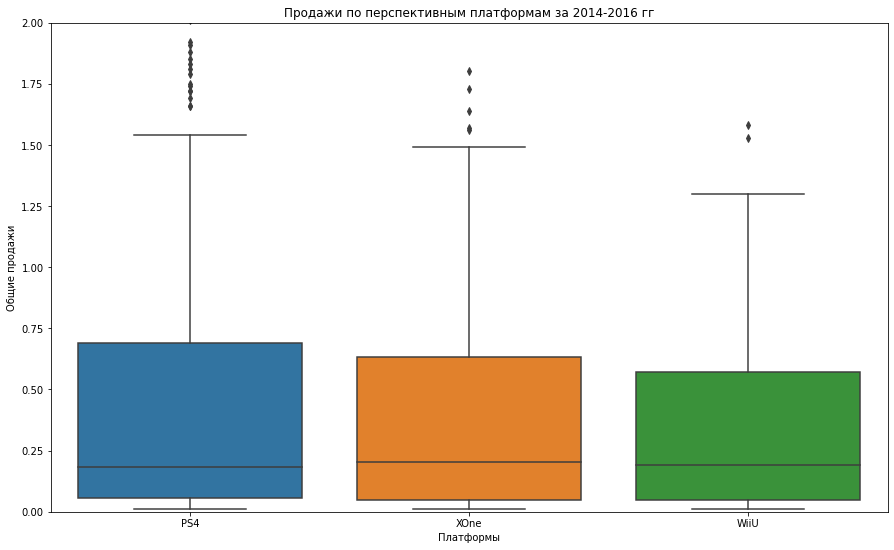

In [32]:
plt.figure(figsize=(15, 9))
(sns.boxplot(data = new_games, y = 'general_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам за 2014-2016 гг', 
         xlabel = 'Платформы', 
         ylabel = 'Общие продажи',
         ylim=(0, 2)))
plt.show()

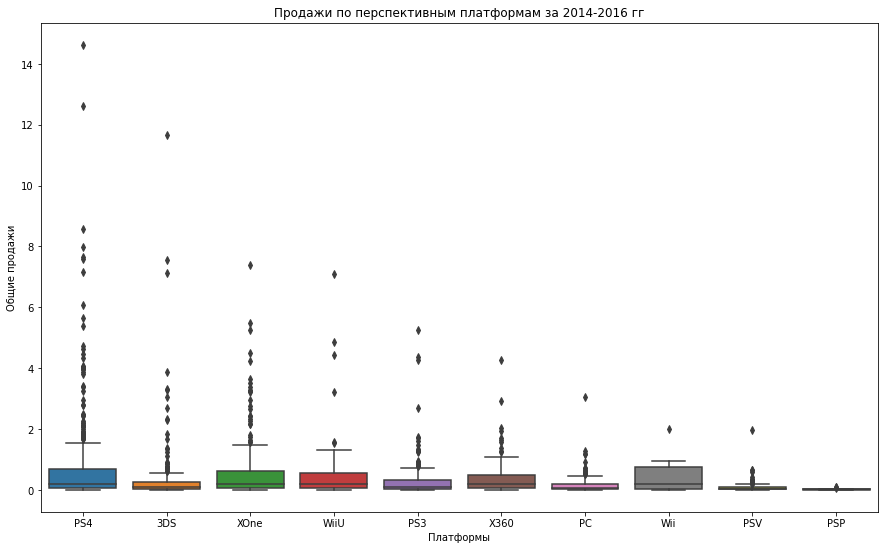

In [33]:
plt.figure(figsize=(15, 9))
(sns.boxplot(data = actual_games, y = 'general_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам за 2014-2016 гг', 
         xlabel = 'Платформы', 
         ylabel = 'Общие продажи'))
plt.show()

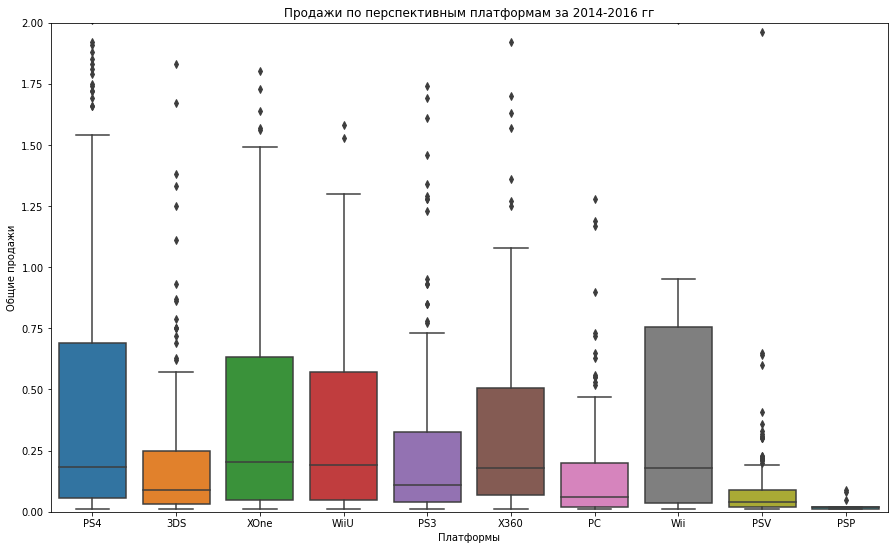

In [34]:
plt.figure(figsize=(15, 9))
(sns.boxplot(data = actual_games, y = 'general_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам за 2014-2016 гг', 
         xlabel = 'Платформы', 
         ylabel = 'Общие продажи',
         ylim=(0, 2)))
plt.show()

### Вывод

На данном графике видно, что распределение продаж среди платформ примерно одинаковое и медиана продаж находится на примерно одном уровне (0,2 миллиона проданных копий). Также можно отметить значения, выходящие за пределы 3 квартиля, доходящие почти до 15 млн проданных копий. Поэтому не стоит отбрасывать те значения, что находятся за верхним усом ящика, так как это самые продаваемые игры. Данные платформы отлично подходят для дальнейших перспектив. 

##  Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков

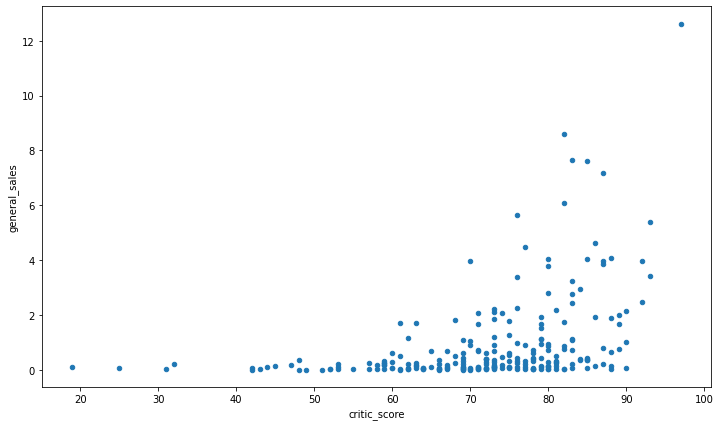

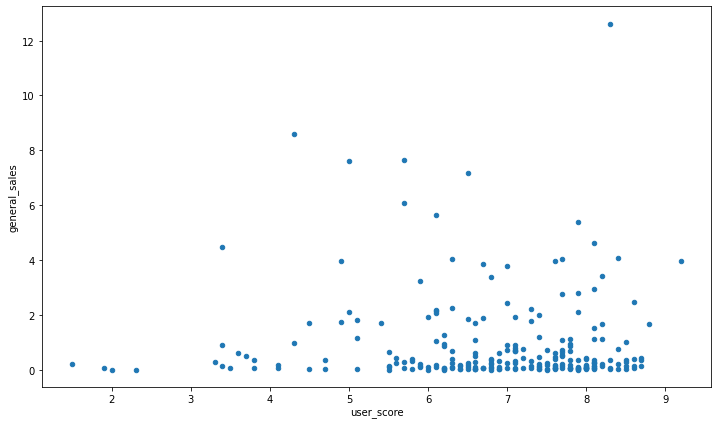

critic_score     0.401903
user_score      -0.043186
general_sales    1.000000
Name: general_sales, dtype: float64


In [35]:
games_on_platform = new_games.query(
    'platform == "PS4" & critic_score != -10 & user_score != -10 ')
games_on_platform[games_on_platform['critic_score'] != '-10'].plot(
    kind='scatter', 
    x='critic_score', 
    y='general_sales', 
    figsize = (12,7))
games_on_platform[games_on_platform['user_score'] != '-10'].plot(
    kind='scatter', 
    x='user_score',
    y='general_sales', 
    figsize = (12,7))
plt.show()
print(games_on_platform[(games_on_platform['critic_score'] != '-10') 
                        & (games_on_platform['user_score'] != '-10')]
                       [['critic_score', 'user_score', 'general_sales']].corr()['general_sales'])


### Вывод

Как видно из графиков, корреляция между пользовательсикими оценками и продажами нет, так как значение почти нулевое. 
А вот оценки критиков не так, чтобы сильно, но влияют на продажи игр, об этом нам говорит корреляция в 40 процентов, чем выше оценка критиков, тем больше происходит продаж. 

PS4


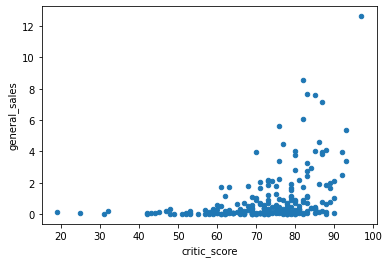

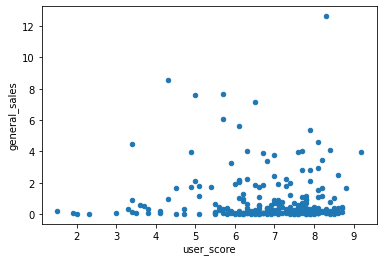

critic_score     0.401903
user_score      -0.043186
general_sales    1.000000
Name: general_sales, dtype: float64
WiiU


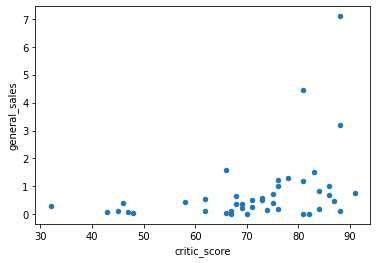

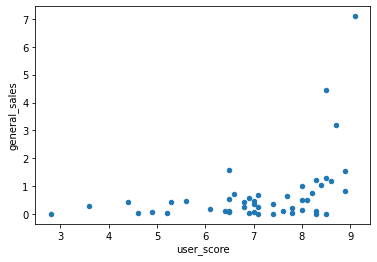

critic_score     0.375640
user_score       0.411451
general_sales    1.000000
Name: general_sales, dtype: float64
XOne


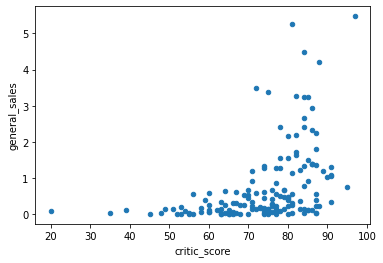

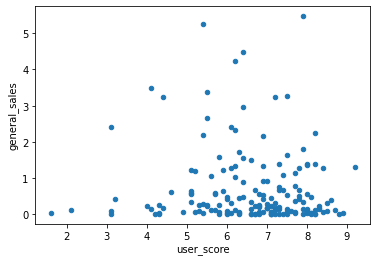

critic_score     0.422112
user_score      -0.091734
general_sales    1.000000
Name: general_sales, dtype: float64


In [36]:
for platform, games_on_platform in new_games.groupby('platform'):
    print('='*30)
    print(platform)
    games_on_platform[games_on_platform['critic_score'] != -10].plot(
        kind='scatter', 
        x='critic_score', 
        y='general_sales')
    games_on_platform[games_on_platform['user_score'] != -10].plot(
        kind='scatter',
        x='user_score',
        y='general_sales')
    plt.show()
    print(games_on_platform[(games_on_platform['critic_score'] != -10) 
                        & (games_on_platform['user_score'] != -10)]
                       [['critic_score', 'user_score', 'general_sales']].corr()['general_sales'])
    

### Вывод

- PS4
Сделал выводы выше


- WiiU
Корреляция между количеством покупок и оценками критиков и пользовательскими оценками существует, не очень большая но равная 37% для критиков и 41% для пользовательских оценок. Чем выше оценки пользователей и критиков, чем чаще покупают игры для WiiU. 


- XOne
Корреляция между количеством покупок и оценками критиков равна 42%, это говорит о наличии корреляции, но не прямой зависимости. Что касается пользовательских оценок, здесь не наблюдается корреляции, взаимосвязь данных параметров мала. 

## Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

По потенциально прибыльным платформам

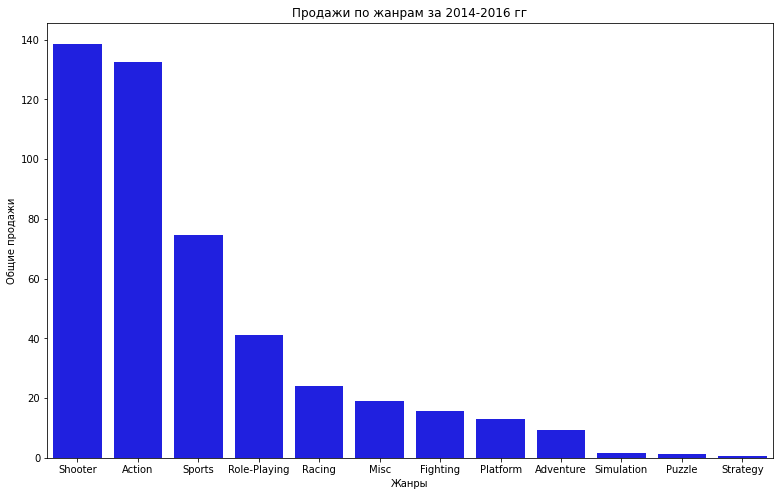

In [37]:
platform_sales_fresh = (
    new_games
    .pivot_table(index='genre', values='general_sales', aggfunc='sum')
    .sort_values('general_sales', ascending=False)
)

plt.figure(figsize=(13, 8))
(sns.barplot(data = platform_sales_fresh, x = platform_sales_fresh.index, y = 'general_sales', color = 'blue')
    .set(title = 'Продажи по жанрам за 2014-2016 гг', xlabel = 'Жанры', ylabel = 'Общие продажи'))

plt.show()

По всем актуальным 

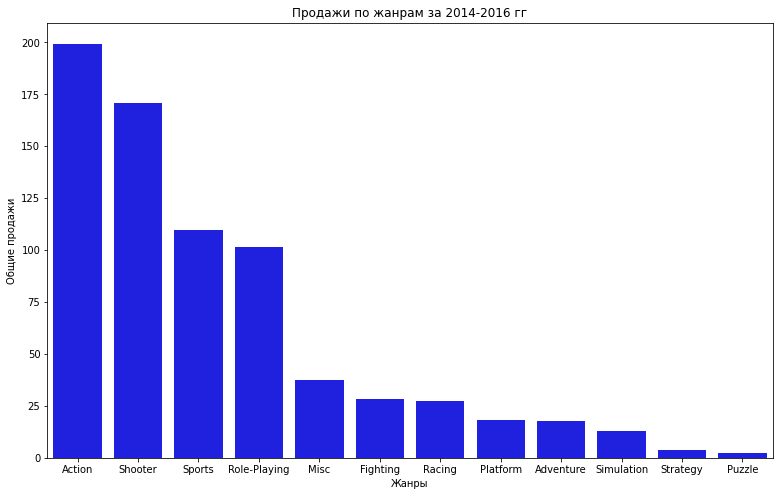

In [38]:
platform_sales_fresh = (
    actual_games
    .pivot_table(index='genre', values='general_sales', aggfunc='sum')
    .sort_values('general_sales', ascending=False)
)

plt.figure(figsize=(13, 8))
(sns.barplot(data = platform_sales_fresh, x = platform_sales_fresh.index, y = 'general_sales', color = 'blue')
    .set(title = 'Продажи по жанрам за 2014-2016 гг', xlabel = 'Жанры', ylabel = 'Общие продажи'))

plt.show()

### Вывод

Самые прибыльные жанры являются шутеры и экшены. Значения их продаж почти доходят до 140 млн проданных копий. 

ТОП 4 можно отметить следующие жанры:
- Шутеры
- Экшены
- Спортивные игры
- Ролевые игры

по потенциально прибыльным

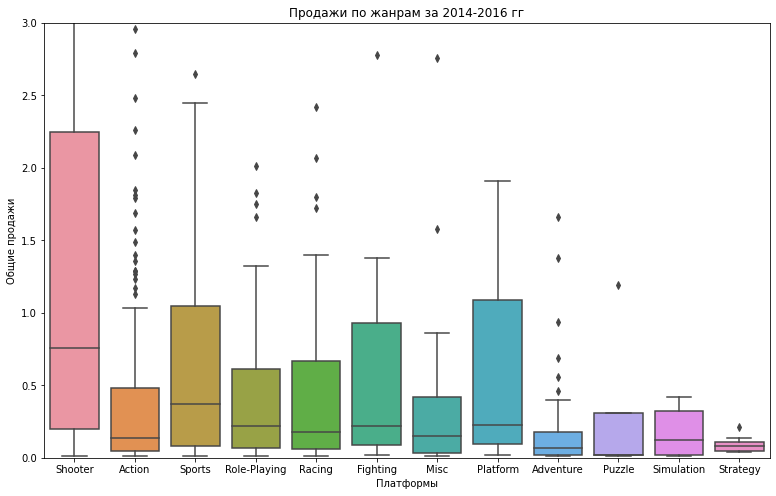

In [39]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = new_games, y = 'general_sales', x='genre')
    .set(title = 'Продажи по жанрам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3)))

plt.show()

по актуальным

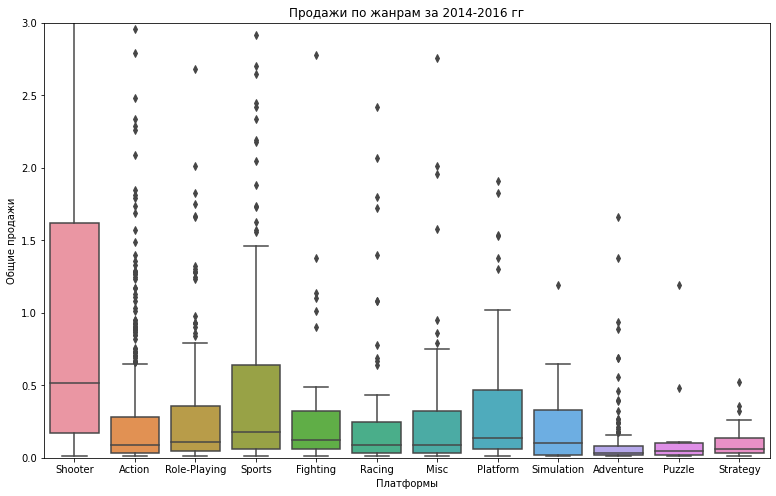

In [40]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = actual_games, y = 'general_sales', x='genre')
    .set(title = 'Продажи по жанрам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3)))

plt.show()

### Вывод

На данном графике видно, что хорошо продаются шутеры, медиана продаж данного жанра превосходит остальные жанры. Данный жанр можно считать привлекательным для продаж. Большинство жанров усредненные и имеют похожие медианы. Еще можно выделить платформеры и спортивные игры, они тоже имеют неплохие показатели. 

# Составьте портрет пользователя каждого региона (NA, EU, JP)

## Самые популярные платформы (топ-5)

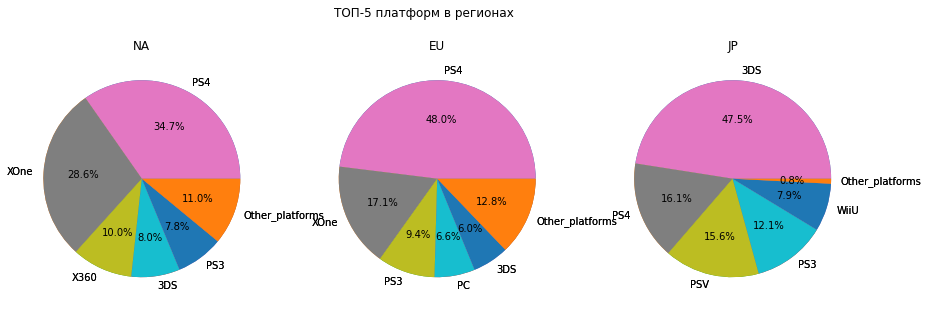

In [41]:
# список регионов
countries = actual_games.columns[4:7]
# круговая диаграмма для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 платформ в регионах')
for i in range(3):
  # 5 самых продающих платформ
  df_i = (actual_games.groupby('platform')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в Other_platforms
  df_i = df_i.append({'platform': 'Other_platforms', countries[i]: actual_games[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['platform'])
  axs[i].pie(df_i[countries[i]], labels = df_i['platform'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()


### Вывод

Разница между регионами ощутима. 

Можно отметить сходство Северной Америки и Европы в том плане, что в обеих регионах на первом месте стоит платформа PS4, а второе место занимает с небольшим отрывом XOne. Япония по сравнению с другими регионами своеобразна, здесь на первом месте стоит 3DS, второе место занимает PS4, и на третьем находится PSV. Кстати третьи места среди Сев Америки и Европы тоже различаются, там находится X360 и PS3 соответсвенно. 

## Самые популярные жанры (топ-5)

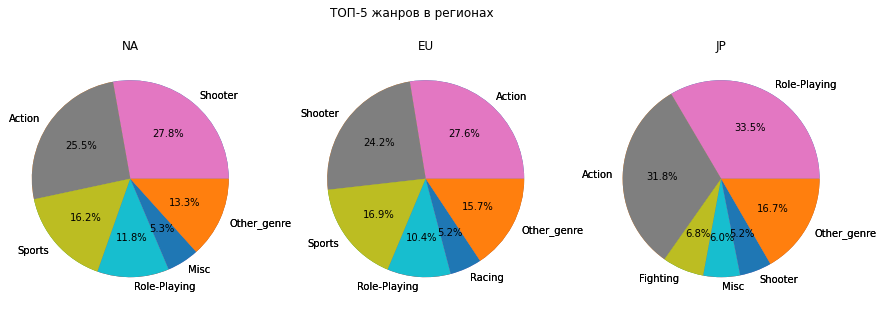

In [42]:
# круговая диаграмма для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(3):
  # 5 самых продающих жанров
  df_i = (actual_games.groupby('genre')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в Other_genre
  df_i = df_i.append({'genre': 'Other_genre', countries[i]: actual_games[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['genre'])
  axs[i].pie(df_i[countries[i]], labels = df_i['genre'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()


### Вывод

На диаграммах видно, что первое место в Сев Америке занимают Шутеры, в Европе – это Экшен, а в Японии – Ролевые игры. 
Вторые места тоже не везде совпали,  у Сев Америки и Японии – это Экшен, а вот в Европе на втором месте Шутеры. Третье место в Сев Америке и Европе разделили спортивные игры, чего нельзя сказать про Японию, на третьем месте в этой стране популярен файтинг. Из данных диаграмм можно сделать вывод, что вкусовые предпочтения зависят от культуры и места проживания, так как во всех регионах показатели сильно разнятся.  

## Влияет ли рейтинг ESRB на продажи в отдельном регионе

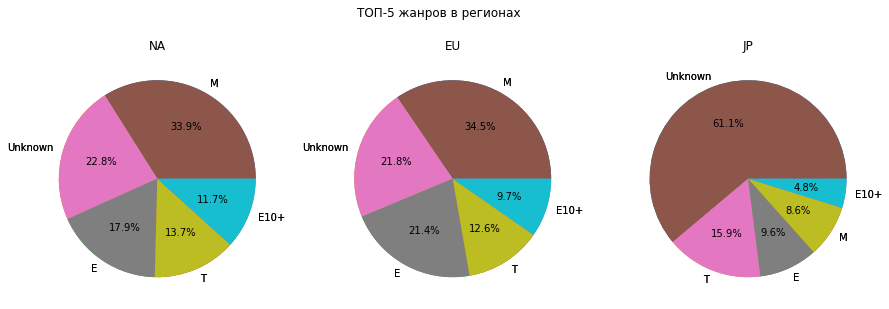

In [43]:
# круговая диаграмма для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(3):
  # влияние рейтинга
  df_i = (actual_games.groupby('rating')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  axs[i].pie(df_i[countries[i]], labels = df_i['rating'])
  axs[i].pie(df_i[countries[i]], labels = df_i['rating'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()


### Вывод

На данных диаграммах видно, что рейтинг ESRB не сильно влияет на продажи, так как распределение среди рейтингов примерно одинаковое. Исключение составляет Япония, в данном регионе, видимо, пользователи любят кастомные игры, или игры своего собственного производства, так как компания ESRB в основном базируется на оценивании Американских и Канадских компаний. Если посмотреть на диаграммы Европы и Сев Америки повнимательнее, то можно выделить категорию М - для взрослых, она занимает большее место на рынке среди других игр. 

**Портрет Американца**
- Любит играть на плейстешн 4
- Чаще всего играет в шутеры
- Играет в игры для взрослых, видимо в играх много крови

**Портрет Европейца**
- Любит поиграть в PlayStation 4
- В основном он проходит игры-экшены
- Возможно там тоже много крови, потому что европеец любит играть в игры для взрослых

**Портрет Японца**
- Чаще всего играет на 3DS
- Любит поиграть в ролевые игры
- Любит кастомные игры (возможно своего производства), то есть недооценнные игровые шедевры


# Проверка гипотез

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза (H0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтерантивная гипотеза (H1): Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [44]:
# удаление значений-заглушек
score = actual_games[actual_games['user_score'] != -10]

print('Средний пользовательский рейтинг платформ Xbox One', round(score.query('platform == "XOne"')['user_score'].mean(),2))
print('Средний пользовательский рейтинг платформ PC', round(score.query('platform == "PC"')['user_score'].mean(),2))
print()

results = st.ttest_ind(
    score.query('platform == "XOne"')['user_score'], 
    score.query('platform == "PC"')['user_score'], 
    equal_var=False)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг платформ Xbox One 6.59
Средний пользовательский рейтинг платформ PC 6.3

p-значение: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


### Вывод

Нет оснований полагать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются. 

## Средние пользовательские рейтинги жанров Action и Sports разные

Нулевая гипотеза (H0): Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтерантивная гипотеза (H1): Средние пользовательские рейтинги жанров Action и Sports различаются.

In [45]:
print('Средний пользовательский рейтинг жанра экшен', round(score.query('genre == "Action"')['user_score'].mean(),2))
print('Средний пользовательский рейтинг жанра спортивных игр', round(score.query('genre == "Sports"')['user_score'].mean(),2))
print()

results = st.ttest_ind(
    score.query('genre == "Action"')['user_score'], 
    score.query('genre == "Sports"')['user_score'], 
    equal_var=False)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг жанра экшен 6.76
Средний пользовательский рейтинг жанра спортивных игр 5.23

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


### Вывод

Есть все основания отвергнуть нулевую гипотезу и не отвергнуть альтернативную. 

# Общий вывод

- [x]  Заменил названия столбцов (привел к нижнему регистру);
- [x]  Преобразовал данные в нужные типы. Описал, в каких столбцах заменил тип данных и почему;
- [x]  Обработал пропуски;
- [x]  Объяснил, почему заполнил пропуски определённым образом или почему не стал это делать;
- [x]  Описал причины, которые могли привести к пропускам;
- [x]  Обратил внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрал это значение и описал, как его обработал;
- [x]  Посчитал суммарные продажи во всех регионах и записал их в отдельный столбец.

--------

- Развитие игр с 1980 года по 2000 было слабым.

- В 2000 году мы видим активный рост количества игр на полках магазинов. Продолжался этот рост до 2009 года.

- На 2008 и 2009 год приходится пик графика, значит в эти года производили больше всего игр (1427 и 1426 игр соответсвенно).

- Начиная с 2010 года количество выпускаемых игр значительно снизилось и остановилось на отметке в 502 игры.

-------

В топ 6 конкурентов среди продаж вошли:
- PlayStation 2 (успешен в 2002-2004 годах)
- Xbox360 (успешен в 2010-2011 годах)
- PlayStation 3 (успешен в 2008-2011 годах)
- Wii Nintendo (успешен в 2006-2009 годах)
- Nintendo DS (успешен в 2007-2008 годах)
- PlayStation (успешен в 1998-1999 годах)

Новые платформы быстро набирают популярность, наращивают/удерживают ее в течение 3-4 лет и затем их продажи снижаются. 
При этом видно, что из представленного ТОПа все платформы уже не являются актуальными. 

--------

Платформы, показывающие успешные показатели по продажам за 2014-2016 год значительно отличаются от того графика, где представлены продажи платформ за все время. Если раньше лидером по продажам был PS2, то сейчас на лидирующей строчке оказалась PS4, и почетное второе место по продажам игр за 2014-2016 год занимает XboxOne. PS4 и XboxOne являются привлекательнее остальных платформ.

--------

Потенциально прибыльные платформы:

- PS4
- XOne
- WiiU

------

Корреляция для PS4 (потенциально самой успешной платформы) между пользовательсикими оценками и продажами нет, так как значение почти нулевое. А вот оценки критиков не так, чтобы сильно, но влияют на продажи игр, об этом нам говорит корреляция в 40 процентов, чем выше оценка критиков, тем больше происходит продаж.

-------

Самые прибыльные жанры являются шутеры и экшены. Значения их продаж почти доходят до 140 млн проданных копий. 

ТОП 4 можно отметить следующие жанры:
- Шутеры
- Экшены
- Спортивные игры
- Ролевые игры

-------

**Портрет Американца**
- Любит играть на плейстешн 4
- Чаще всего играет в шутеры
- Играет в игры для взрослых, видимо в играх много крови

**Портрет Европейца**
- Любит поиграть в PlayStation 4
- В основном он проходит игры-экшены
- Возможно там тоже много крови, потому что европеец любит играть в игры для взрослых

**Портрет Японца**
- Чаще всего играет на 3DS
- Любит поиграть в ролевые игры
- Любит кастомные игры (возможно своего производства), то есть недооценнные игровые шедевры

-----------

Не отвергаем гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Отвергам гипотезу, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

# Чек-лист готовности проекта

**Шаг 1. Подготовка данных**

**Надо:**
- [x]  Заменить названия столбцов (привести к нижнему регистру);
- [x]  Преобразовать данные в нужные типы. Описать, в каких столбцах заменил тип данных и почему;
- [x]  Обработать пропуски при необходимости:
- [x]  Объяснить, почему заполнил пропуски определённым образом или почему не стал это делать;
- [x]  Описать причины, которые могли привести к пропускам;
- [x]  Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрать это значение и описать, как его обработать;
- [x]  Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

**Шаг 2. Провести исследовательский анализ данных**

**Надо:**
- [x]  Посмотреть, сколько игр выпускалось в разные годы.
- [x]  Посмотреть, как менялись продажи по платформам.
- [x]  Посмотреть какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
- [x]  Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
- [x]  Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
- [x]  Посмотреть на общее распределение игр по жанрам.

**Шаг 3. Составить портрет пользователя каждого региона**

**Надо:**
- [x]  Определить для пользователя каждого региона (NA, EU, JP):
    - [x]  Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    - [x]  Самые популярные жанры (топ-5). Поясните разницу.
    - [x]  Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Шаг 4. Проверить гипотезы**

- [x]  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- [x]  Средние пользовательские рейтинги жанров Action (англ. «действие», экшенигры) и Sports (англ. «спортивные соревнования») разные.

**Шаг 5. Написать общий вывод**